In [1]:
import os
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the model from disk
data_folder = os.path.join('..', '..', 'Data', 'feature_engineered')
file_path = os.path.join(data_folder, 'rf_complete.pkl')
best_rf = joblib.load(file_path)


# Print hyperparameters of the model
print("Hyperparameters of the model:")
print(f"Number of estimators (n_estimators): {best_rf.n_estimators}")
print(f"Maximum depth of trees (max_depth): {best_rf.max_depth}")
print(f"Minimum samples split (min_samples_split): {best_rf.min_samples_split}")
print(f"Minimum samples leaf (min_samples_leaf): {best_rf.min_samples_leaf}")

Hyperparameters of the model:
Number of estimators (n_estimators): 50
Maximum depth of trees (max_depth): 30
Minimum samples split (min_samples_split): 2
Minimum samples leaf (min_samples_leaf): 2


In [3]:
import os
import pickle

data_folder = os.path.join('..', '..', 'Data', 'feature_engineered')

# Define the path to the specific file you want to load
file_path = os.path.join(data_folder, 'X_fe_trial.pkl')

# Load the data from the specified file
with open(file_path, 'rb') as f:
    X_fe_trial = pickle.load(f)

# Optionally, print the shape or some other details to verify that it's loaded correctly
print("Shape of X_fe_trial:", X_fe_trial.shape)

Shape of X_fe_trial: torch.Size([100, 64, 64, 15])


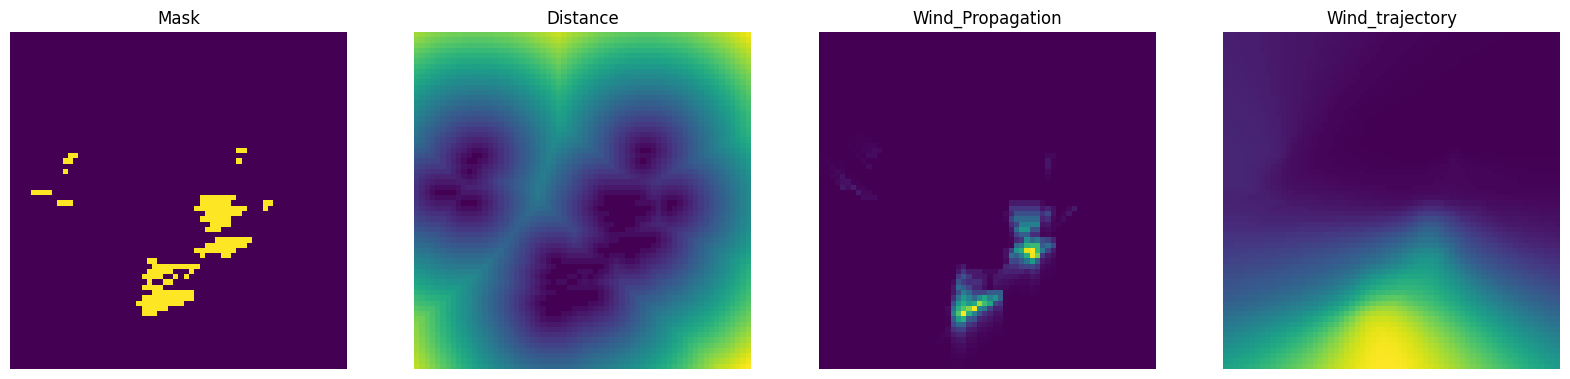

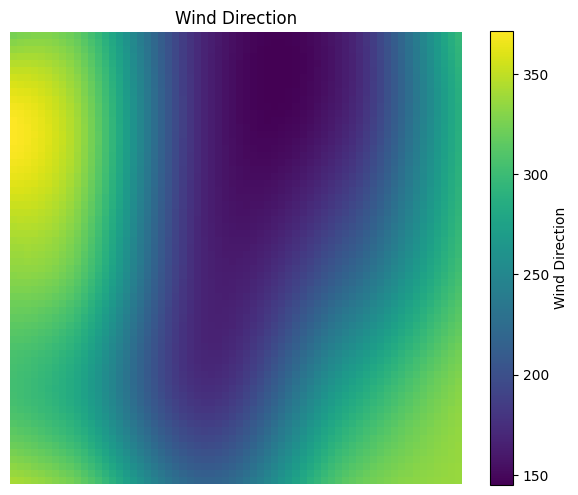

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Select one random sample from the dataset
random_index = torch.randint(0, X_fe_trial.shape[0], (1,)).item()
sample_tensor = X_fe_trial[random_index]

# Prepare data for DataFrame
pixel_data_list = []
for row in range(sample_tensor.shape[0]):
    for col in range(sample_tensor.shape[1]):
        pixel_data = {'row': row, 'col': col}
        for feature_idx in range(sample_tensor.shape[2]):
            pixel_data[f'feature_{feature_idx+1}'] = sample_tensor[row, col, feature_idx].item()
        pixel_data_list.append(pixel_data)

# Create a DataFrame
pixel_df = pd.DataFrame(pixel_data_list)

# Define new column names mapping from your setup
new_column_names = {
    'feature_1': 'Elevation',
    'feature_2': 'Wind_direction',
    'feature_3': 'Wind_speed',
    'feature_4': 'Min_temp',
    'feature_5': 'Max_temp',
    'feature_6': 'Humidity',
    'feature_7': 'Precipitation',
    'feature_8': 'Drought',
    'feature_9': 'Vegetation',
    'feature_10': 'Population_density',
    'feature_11': 'Energy_release',
    'feature_12': 'Mask',
    'feature_13': 'Distance',
    'feature_14': 'Wind_Propagation',
    'feature_15': 'Wind_trajectory'
}
pixel_df.rename(columns=new_column_names, inplace=True)

# Plotting features except 'Wind_direction'
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Four features to plot
features_to_plot = ['Mask', 'Distance', 'Wind_Propagation', 'Wind_trajectory']

for i, feature in enumerate(features_to_plot):
    matrix = pixel_df[feature].values.reshape(64, 64)
    axs[i].imshow(matrix, cmap='viridis')
    axs[i].set_title(feature)
    axs[i].axis('off')

# Separate plot for 'Wind_direction' with a legend
fig2, ax2 = plt.subplots(figsize=(6, 5))
wind_direction_matrix = pixel_df['Wind_direction'].values.reshape(64, 64)
im = ax2.imshow(wind_direction_matrix, cmap='viridis')
ax2.set_title('Wind Direction')
ax2.axis('off')

# Adding colorbar for wind direction
cbar = fig2.colorbar(im, ax=ax2, orientation='vertical')
cbar.set_label('Wind Direction')

plt.tight_layout()
plt.show()
